In [2]:
!pip install pyarrow -q
!pip install tensorflow pandas numpy scikit-learn matplotlib psutil

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 596.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.9 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive 挂载成功！
TensorFlow 版本: 2.19.0
NumPy 版本: 2.0.2
Pandas 版本: 2.2.2
GPU Available: []
--- 步骤 2: 加载数据 ---
尝试使用 pd.read_parquet 加载: /content/drive/MyDrive/Transformer_Project/data_with_lags_s1_i1.parquet
成功加载 Parquet 数据: /content/drive/MyDrive/Transformer_Project/data_with_lags_s1_i1.parquet
数据形状: (1461, 48)
尝试将列 'date' 设置为索引...
成功将 'date' 设置为索引。

目标变量: sales
使用的特征变量: ['sales', 'year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter', 'is_month_start', 'is_month_end', 'sales_lag_1', 'sales_lag_7', 'sales_lag_14', 'sales_lag_21', 'sales_lag_28', 'sales_lag_30', 'sales_lag_60', 'sales_lag_90', 'sales_lag_180', 'sales_lag_364', 'sales_lag_365', 'sales_roll_mean_7d', 'sales_roll_std_7d', 'sales_roll_median_7d', 'sales_roll_min_7d', 'sales_roll_max_7d', 'sales_roll_mean_14d', 'sales_roll_std_14d', 'sales_roll_median_14d', 'sales_roll_min_14d',

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape            ┃        Param # ┃ Connected to            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 60, 46)          │              0 │ -                       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ positional_encoding         │ (None, 60, 46)          │              0 │ input_layer[0][0]       │
│ (PositionalEncoding)        │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ multi_head_attention        │ (None, 60, 46)          │         95,790 │ positional_encoding[0]… │
│ (MultiHeadAttention)        │                         │                │ positional_encoding[0]… │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ dropout_1 (Dropout)         │ (None, 60, 46)          │              0 │ multi_head_attention[0… │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ add (Add)                   │ (None, 60, 46)          │              0 │ positional_encoding[0]… │
│                             │                         │                │ dropout_1[0][0]         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ layer_normalization         │ (None, 60, 46)          │             92 │ add[0][0]               │
│ (LayerNormalization)        │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv1d (Conv1D)             │ (None, 60, 128)         │          6,016 │ layer_normalization[0]… │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ dropout_2 (Dropout)         │ (None, 60, 128)         │              0 │ conv1d[0][0]            │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv1d_1 (Conv1D)           │ (None, 60, 46)          │          5,934 │ dropout_2[0][0]         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ add_1 (Add)                 │ (None, 60, 46)          │              0 │ layer_normalization[0]… │
│                             │                         │                │ conv1d_1[0][0]          │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ layer_normalization_1       │ (None, 60, 46)          │             92 │ add_1[0][0]             │
│ (LayerNormalization)        │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ multi_head_attention_1      │ (None, 60, 46)          │         95,790 │ layer_normalization_1[… │
│ (MultiHeadAttention)        │                         │                │ layer_normalization_1[… │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ dropout_4 (Dropout)         │ (None, 60, 46)          │              0 │ multi_head_attention_1… │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ add_2 (Add)                 │ (None, 60, 46)          │              0 │ layer_normalization_1[… │
│                             │                         │                │ dropout_4[0][0]         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ layer_normalization_2       │ (None, 60, 46)          │    

 Total params: 434,769 (1.66 MB)

 Trainable params: 434,769 (1.66 MB)

 Non-trainable params: 0 (0.00 B)


--- 步骤 6: 编译和训练模型 ---
模型编译完成。

开始训练模型 (Epochs: 50, Batch Size: 64)...
Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 816ms/step - loss: 0.0835 - val_loss: 0.0155 - learning_rate: 1.0000e-04
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 716ms/step - loss: 0.0432 - val_loss: 0.0152 - learning_rate: 1.0000e-04
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 676ms/step - loss: 0.0257 - val_loss: 0.0193 - learning_rate: 1.0000e-04
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 680ms/step - loss: 0.0222 - val_loss: 0.0120 - learning_rate: 1.0000e-04
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 663ms/step - loss: 0.0211 - val_loss: 0.0178 - learning_rate: 1.0000e-04
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 681ms/step - loss: 0.0198 - val_loss: 0.0134 - learning_rate: 1.0000e-04
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 688ms/step - loss: 0.0189 - val_loss: 0.0134 - learning_rate: 1.0000e-04
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 677ms/step - loss: 0.0173 - val_loss: 0.0139 - learning_rate: 1.0000e-04
Epoch 9/5

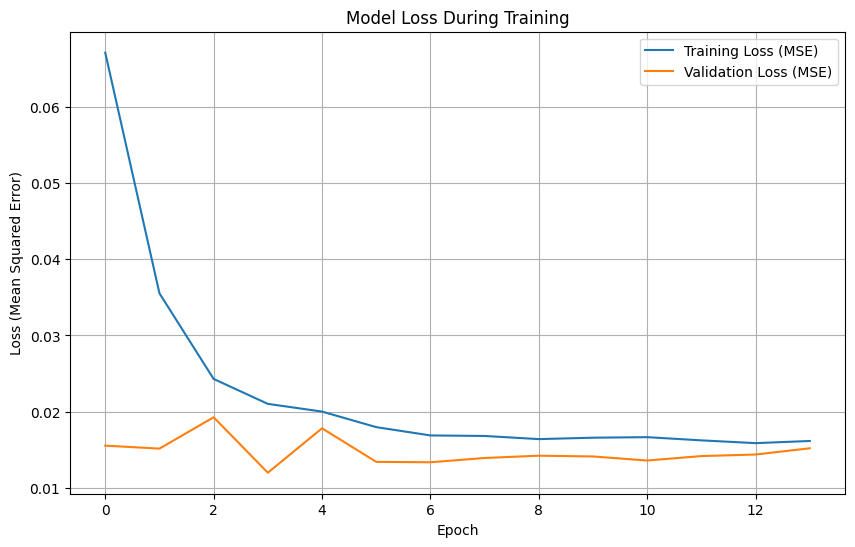

损失函数曲线图已保存至: /content/drive/MyDrive/Transformer_Project/loss_curve_retail.png


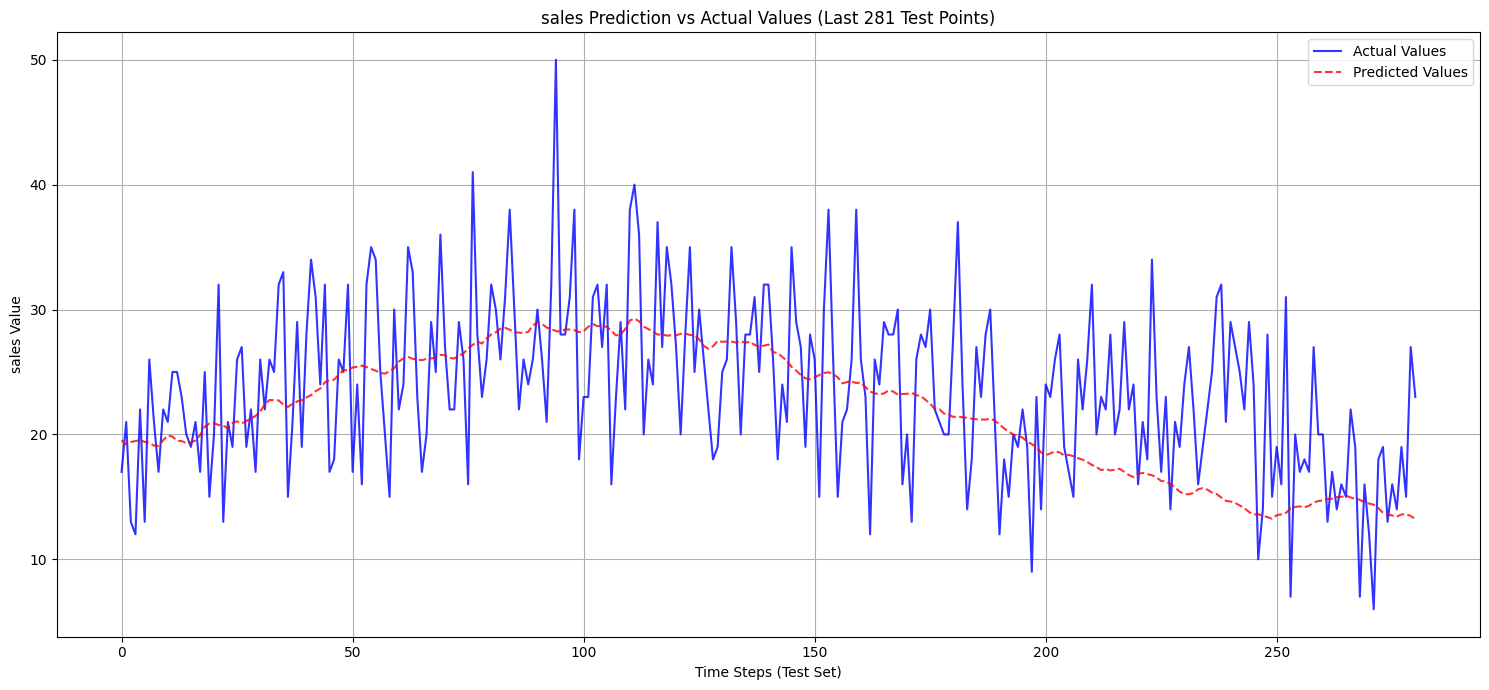

预测值与真实值对比图已保存至: /content/drive/MyDrive/Transformer_Project/prediction_vs_actual_retail.png

--- 步骤 9: 生成日志文件 ---
训练日志已成功保存至: /content/drive/MyDrive/Transformer_Project/training_log_retail.txt

--- Colab Notebook 执行完毕 ---


In [1]:
# -*- coding: utf-8 -*-
"""
Transformer_Finance_TimeSeries_Colab_Fixed.ipynb

Automatically generated by Colaboratory.

Trains a Transformer model for time series forecasting using preprocessed financial data.
Includes fix for potential parameter type errors during model build.
"""

#@markdown ## 0. 准备工作：挂载 Google Drive 并检查/安装库
#@markdown ---
#@markdown **重要提示:**
#@markdown 1. 确保你已经将 `processed_finance_data.csv` 文件上传到你的 Google Drive。
#@markdown 2. **在下一个代码单元格中，正确设置 `gdrive_base_path` 指向你存放数据和 Notebook 的 Google Drive 文件夹路径。**
#@markdown 3. 在 Colab 菜单中选择 "Runtime" -> "Change runtime type" -> "GPU" 以启用硬件加速。
#@markdown ---

from google.colab import drive
import os

try:
    drive.mount('/content/drive')
    print("Google Drive 挂载成功！")
except Exception as e:
    print(f"Google Drive 挂载失败: {e}")
    print("请确保你已授权 Colab 访问 Google Drive。")

# 检查/安装 psutil (通常 Colab 已包含，以防万一)
# !pip install psutil -q

#@markdown ## 1. 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # MAPE needs careful handling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math
import time
import psutil # 用于监控内存
import datetime

# 设置随机种子以保证结果可复现
tf.random.set_seed(42)
np.random.seed(42)

print(f"TensorFlow 版本: {tf.__version__}")
print(f"NumPy 版本: {np.__version__}")
print(f"Pandas 版本: {pd.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")


#@markdown ## 2. 定义参数和加载数据
#@markdown ---
#@markdown **<<< 用户需要配置的部分 >>>**

#@markdown ### **重要: 设置 Google Drive 基础路径**
#@markdown 请将下面的路径修改为你存放 `processed_finance_data.csv` 文件和 Notebook 的 Google Drive 文件夹路径。
#@markdown 例如：如果你的文件在 "我的云端硬盘/Colab_Projects/Finance" 文件夹中，则路径应为 `'/content/drive/MyDrive/Colab_Projects/Finance/'`
gdrive_base_path = '/content/drive/MyDrive/Transformer_Project/' # <--- ******* 修改这里! *******

# 数据文件名 (确保它在上面的 gdrive_base_path 文件夹中)
csv_filename = 'data_with_lags_s1_i1.parquet' #@param {type:"string"}

# 假设 'Date' 或类似列是时间索引，如果不是，请指定正确的列或设置为 None
# 如果设置为 None，请确保 CSV 文件中的数据是按时间顺序排列的
# --- 请根据你的实际列名修改 ---
date_column = 'date' #@param {type:"string"} # 例如 'Date', 'Timestamp', 或 'None'

# 需要预测的目标列名
target_column = 'sales' #@param {type:"string"} # 例如 'Close', 'Value', 'Sales'

# 用作输入的特征列名列表 (留空则使用所有非日期/索引列)
# 例如: feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_10', 'RSI']
# 如果数据已预处理且只包含必要特征，可以留空。
feature_columns = ['sales', 'year', 'month', 'day', 'dayofweek', 'dayofyear',
       'weekofyear', 'quarter', 'is_month_start', 'is_month_end',
       'sales_lag_1', 'sales_lag_7', 'sales_lag_14', 'sales_lag_21',
       'sales_lag_28', 'sales_lag_30', 'sales_lag_60', 'sales_lag_90',
       'sales_lag_180', 'sales_lag_364', 'sales_lag_365', 'sales_roll_mean_7d',
       'sales_roll_std_7d', 'sales_roll_median_7d', 'sales_roll_min_7d',
       'sales_roll_max_7d', 'sales_roll_mean_14d', 'sales_roll_std_14d',
       'sales_roll_median_14d', 'sales_roll_min_14d', 'sales_roll_max_14d',
       'sales_roll_mean_28d', 'sales_roll_std_28d', 'sales_roll_median_28d',
       'sales_roll_min_28d', 'sales_roll_max_28d', 'sales_roll_mean_60d',
       'sales_roll_std_60d', 'sales_roll_median_60d', 'sales_roll_min_60d',
       'sales_roll_max_60d', 'sales_roll_mean_90d', 'sales_roll_std_90d',
       'sales_roll_median_90d', 'sales_roll_min_90d', 'sales_roll_max_90d'
       ] #@param {type:"raw"}

# 时间序列参数
sequence_length = 60  #@param {type:"integer"} # 使用过去 N 个时间步的数据来预测下一个时间步
test_size = 0.2       #@param {type:"number"} # 测试集比例 (例如 0.2 表示 20%)

# Transformer 模型超参数
head_size = 128             #@param {type:"integer"} # 注意力头的维度
num_heads = 4               #@param {type:"integer"} # 注意力头的数量
ff_dim = 128                #@param {type:"integer"} # 前馈网络内部层的维度
num_transformer_blocks = 4  #@param {type:"integer"} # Transformer 块的数量
mlp_units = 64          #@param {type:"raw"} # 输出 MLP 层的单元数, e.g., [64] or [128, 64]
dropout = 0.1               #@param {type:"number"} # Transformer 块中的 Dropout 率
mlp_dropout = 0.1           #@param {type:"number"} # MLP 层中的 Dropout 率

# 训练参数
epochs = 50                 #@param {type:"integer"} # 训练轮数 (可根据需要提前停止)
batch_size = 64             #@param {type:"integer"} # 每批次样本数
learning_rate = 1e-4        #@param {type:"number"} # 学习率
early_stopping_patience = 10 #@param {type:"integer"} # 早停耐心值
reduce_lr_patience = 5      #@param {type:"integer"} # 学习率衰减耐心值

# --- 参数配置结束 ---

# 构建完整文件路径
file_path = os.path.join(gdrive_base_path, csv_filename)
log_file = os.path.join(gdrive_base_path, 'training_log_retail.txt')
model_checkpoint_path = os.path.join(gdrive_base_path, "best_transformer_model_retail.keras")
loss_curve_plot = os.path.join(gdrive_base_path, 'loss_curve_retail.png')
prediction_plot = os.path.join(gdrive_base_path, 'prediction_vs_actual_retail.png')

# 加载数据
# --- 加载数据 (修改为 Parquet) ---
print("--- 步骤 2: 加载数据 ---")
df = None # 初始化 df
df_features = None # 初始化 df_features

# 检查基础路径是否存在
if not os.path.exists(gdrive_base_path):
    print(f"错误：指定的 Google Drive 路径不存在: {gdrive_base_path}")
    print("请确保路径正确，并且 Google Drive 已成功挂载。")
elif not os.path.exists(file_path):
    # 确保文件名正确 (如果用户修改了 csv_filename 但文件是 parquet)
    parquet_filename = csv_filename.replace('.csv', '.parquet') if csv_filename.endswith('.csv') else csv_filename
    file_path = os.path.join(gdrive_base_path, parquet_filename) # 更新文件路径
    if not os.path.exists(file_path):
         print(f"错误: Parquet 数据文件未在指定路径中找到: {file_path}")
         print(f"请确保 '{parquet_filename}' 文件已上传到 '{gdrive_base_path}' 文件夹中。")
    else:
         print(f"注意：假设文件名为 {parquet_filename}")
else:
     # 如果原始 file_path (可能带 .csv 后缀) 能找到，优先使用它
     # 但最好确保 csv_filename 参数反映真实文件名
     if not file_path.endswith('.parquet'):
          print(f"警告：文件路径 '{file_path}' 不是 .parquet 结尾，但将尝试作为 Parquet 读取。建议在参数中修正文件名。")


if os.path.exists(file_path): # 再次检查路径有效性
    try:
        print(f"尝试使用 pd.read_parquet 加载: {file_path}")
        # 使用 read_parquet 读取数据
        df = pd.read_parquet(file_path, engine='pyarrow') # engine='pyarrow' 或 'fastparquet'

        print(f"成功加载 Parquet 数据: {file_path}")
        print(f"数据形状: {df.shape}")

        # 处理日期/索引列 (在读取后进行)
        effective_date_column = date_column if date_column and date_column.lower() != 'none' else None
        if effective_date_column:
            if effective_date_column in df.columns:
                print(f"尝试将列 '{effective_date_column}' 设置为索引...")
                # Parquet 通常会自动推断日期类型，这里不需要 parse_dates
                # 如果需要转换为 datetime (通常不需要，除非它是 object 类型)
                # df[effective_date_column] = pd.to_datetime(df[effective_date_column])
                df.set_index(effective_date_column, inplace=True)
                print(f"成功将 '{effective_date_column}' 设置为索引。")
            else:
                print(f"警告：指定的日期/索引列 '{effective_date_column}' 不在加载的 DataFrame 中。将不设置索引。")
                effective_date_column = None # 标记日期列无效


        # 确定特征列 (逻辑保持不变)
        if not feature_columns:
            if effective_date_column and effective_date_column in df.columns: # 检查是否还在列中（如果未设为索引）
                 feature_columns = df.columns.drop(effective_date_column).tolist()
            elif effective_date_column and effective_date_column == df.index.name: # 检查是否是索引名
                 feature_columns = df.columns.tolist() # 索引不是列，直接用所有列
            else: # 没有日期列或日期列无效
                 feature_columns = df.columns.tolist()
            print(f"自动选择所有可用列作为特征: {feature_columns}")
        else:
            if target_column not in feature_columns:
                print(f"警告: 目标列 '{target_column}' 不在指定的 feature_columns 中，已自动添加。")
                feature_columns.append(target_column)

        # 检查特征列是否存在
        missing_cols = [col for col in feature_columns if col not in df.columns]
        if missing_cols:
            print(f"错误: 以下指定的特征列在 DataFrame 中不存在: {missing_cols}")
            raise ValueError("特征列在 DataFrame 中缺失")
        if target_column not in df.columns:
             print(f"错误: 目标列 '{target_column}' 在 DataFrame 中不存在。")
             raise ValueError("目标列在 DataFrame 中缺失")

        print(f"\n目标变量: {target_column}")
        print(f"使用的特征变量: {feature_columns}")

        # 提取相关数据
        df_features = df[feature_columns].copy()

        # 缺失值处理 (逻辑保持不变)
        if df_features.isnull().sum().sum() > 0:
            print("\n警告：数据中检测到缺失值。将使用前向填充 (ffill)。")
            df_features.ffill(inplace=True)
            if df_features.isnull().sum().sum() > 0:
                print("警告：前向填充后仍有缺失值，将使用后向填充 (bfill)。")
                df_features.bfill(inplace=True)
            if df_features.isnull().sum().sum() > 0:
                print("错误：填充后仍存在无法处理的缺失值。请检查数据。")
                raise ValueError("数据填充后仍有缺失值")
        else:
            print("\n数据完整性检查：未发现缺失值。")

        print("\n数据预览 (特征):")
        print(df_features.head())

    except ImportError:
         print("错误：读取 Parquet 文件需要 'pyarrow' 或 'fastparquet' 库。")
         print("请确保已运行 !pip install pyarrow (或 fastparquet)")
         df_features = None
    except Exception as e:
         print(f"加载或处理 Parquet 数据时发生错误: {e}")
         df_features = None

# --- Parquet 加载结束 ---


#@markdown ## 3. 数据缩放和序列创建
#@markdown **注意:** 即使数据已预处理，对神经网络输入进行 0-1 缩放通常也是必要的。

# --- 数据缩放 ---
print("\n--- 步骤 3: 数据缩放和序列创建 ---")
# 确保 df_features 已成功创建且是有效的 DataFrame
if 'df_features' in locals() and isinstance(df_features, pd.DataFrame):

    # --- 添加检查代码 ---
    print("--- 检查 df_features 的列类型和信息 (执行缩放前) ---")
    df_features.info() # 打印每列的类型和非空计数

    print("\n--- 检查 object 类型列的唯一值 (前 N 个) ---")
    # 选择数据类型为 'object' (通常是字符串) 的列
    object_cols = df_features.select_dtypes(include=['object']).columns
    found_non_numeric = False
    if not object_cols.empty:
        for col in object_cols:
            unique_values = df_features[col].unique()
            print(f"列 '{col}' (类型 object) 的唯一值 (最多显示 50 个): {unique_values[:50]}")
            # 检查是否包含 'train' 字符串或其他常见的非数值指示符
            common_non_numeric = ['train', 'test', 'valid', 'validation', 'Train', 'Test', 'Valid', 'Validation']
            if any(val in unique_values for val in common_non_numeric):
                print(f"*** 警告: 在列 '{col}' 中发现了可能的非数值标签! 请在 Cell 2 中从 feature_columns 排除此列。 ***")
                found_non_numeric = True
            # 可以在这里添加对其他非数值内容的检查
    else:
        print("未找到 object 类型的列。如果后续缩放报错，请检查是否存在看似数字但实际包含非数字字符的列。")

    if found_non_numeric:
         print("\n!!! 重要提示: 检测到包含非数值内容的列。请返回第二个单元格，修改 `feature_columns` 列表，仅包含纯数值特征列，然后再重新运行。 !!!")
         # 可以选择在这里停止执行，或者让它继续尝试并可能在下一步报错
         # raise ValueError("检测到非数值列，请修正 feature_columns") # 取消注释这行可以在这里强制停止

    print("--- 检查代码结束 ---")
    # --- 检查代码结束 ---

    # 如果检查通过（或用户选择忽略警告），则继续执行缩放
    try:
        scaler = MinMaxScaler(feature_range=(0, 1))
        # scaler 需要在整个特征集上 fit，即使我们只预测一列
        scaled_data = scaler.fit_transform(df_features)
        print(f"\n数据已缩放至 [0, 1] 范围，形状: {scaled_data.shape}")

        # 获取目标列在缩放后数据中的索引
        try:
            target_col_index = feature_columns.index(target_column)
            print(f"目标列 '{target_column}' 在缩放数据中的索引为: {target_col_index}")
        except ValueError:
            print(f"错误：目标列 '{target_column}' 不在最终使用的特征列列表中（feature_columns: {feature_columns}）。")
            scaled_data = None # Mark failure

        # --- 创建时间序列样本 ---
        def create_sequences(data, seq_length, target_idx):
            X, y = [], []
            # 数据长度需要至少是 seq_length + 1
            if len(data) <= seq_length:
                 print(f"错误：数据长度 ({len(data)}) 不足以创建长度为 {seq_length} 的序列。")
                 return None, None
            for i in range(len(data) - seq_length):
                X.append(data[i:(i + seq_length)]) # 输入序列
                y.append(data[i + seq_length, target_idx]) # 目标值（下一个时间步的目标列）
            return np.array(X), np.array(y)

        if scaled_data is not None:
            X, y = create_sequences(scaled_data, sequence_length, target_col_index)
            if X is not None and len(X) > 0: # 检查序列是否成功创建且不为空
                 print(f"\n已创建时间序列样本:")
                 print(f"输入 X 的形状: {X.shape}") # (样本数, 时间步长, 特征数)
                 print(f"目标 y 的形状: {y.shape}") # (样本数,)
            elif X is not None and len(X) == 0:
                 print("错误：序列创建成功，但样本数量为零。请检查数据长度和 sequence_length。")
                 X, y = None, None # Mark failure
            else:
                 print("序列创建失败。")
                 X, y = None, None # Mark failure
        else:
            print("错误：scaled_data 无效，无法创建序列。")
            X, y = None, None # Mark failure

    except ValueError as e:
        # 捕获 scaler.fit_transform 可能抛出的 ValueError (例如 "could not convert string to float")
        print(f"\n错误：在执行数据缩放时遇到问题: {e}")
        print("!!! 这通常意味着即使通过了初步检查，df_features 中仍存在非数值数据。请返回第二个单元格，仔细检查并修正 `feature_columns` 列表，确保只包含纯数值列。 !!!")
        X, y = None, None # Mark failure
    except Exception as e:
        print(f"\n错误：在缩放或序列创建过程中发生意外错误: {e}")
        X, y = None, None # Mark failure

# 这个 else 对应于最外层的 if 'df_features' in locals()...
else:
    print("错误：无法执行此步骤（数据缩放和序列创建），因为数据加载或预处理失败（df_features 无效）。请检查之前的步骤。")
    X, y = None, None # Mark failure

#@markdown ## 4. 数据集划分
print("\n--- 步骤 4: 数据集划分 ---")
if X is not None and y is not None: # 确保 X, y 已成功创建且不为 None
    # 按时间顺序划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=False # 时间序列不应打乱顺序
    )
    if len(X_train) == 0 or len(X_test) == 0:
         print("错误：数据集划分后训练集或测试集为空。")
         print(f"请检查原始数据长度、sequence_length ({sequence_length}) 和 test_size ({test_size}) 是否合理。")
         X_train, X_test = None, None # Mark failure
    else:
         print(f"训练集 X_train 形状: {X_train.shape}, y_train 形状: {y_train.shape}")
         print(f"测试集 X_test 形状: {X_test.shape}, y_test 形状: {y_test.shape}")
else:
    print("错误：无法执行此步骤，因为序列创建失败。请检查之前的步骤。")
    X_train, X_test = None, None # Mark failure


#@markdown ## 5. 构建 Transformer 模型
print("\n--- 步骤 5: 构建 Transformer 模型 ---")

# --- Transformer 编码器块 ---
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Multi-Head Self-Attention
    attn_output = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    attn_output = layers.Dropout(dropout)(attn_output)
    out1 = layers.LayerNormalization(epsilon=1e-6)(inputs + attn_output) # Add & Norm

    # Feed Forward Part
    ffn_output = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(out1)
    ffn_output = layers.Dropout(dropout)(ffn_output)
    # Project back to input shape
    ffn_output = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(ffn_output)
    out2 = layers.LayerNormalization(epsilon=1e-6)(out1 + ffn_output) # Add & Norm
    return out2

# --- 位置编码层 ---
# --- 位置编码层 (修正后) ---
class PositionalEncoding(layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        # Precompute the positional encoding matrix
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)
        # Apply sin to even indices in the array; 2i
        sines = tf.math.sin(angle_rads[:, 0::2])
        # Apply cos to odd indices in the array; 2i+1
        cosines = tf.math.cos(angle_rads[:, 1::2])
        # Concatenate sines and cosines
        # For both odd and even d_model, this results in shape (position, d_model)
        pos_encoding = tf.concat([sines, cosines], axis=-1)

        # !!! 下面这行代码是多余的，已被删除 !!!
        # if d_model % 2 != 0:
        #      pos_encoding = tf.concat(
        #          [pos_encoding, tf.zeros([position, 1], dtype=tf.float32)], axis=-1)

        # Add batch dimension
        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        # inputs shape: (batch_size, seq_len, d_model)
        seq_len = tf.shape(inputs)[1]
        # Slice the positional encoding matrix to match the input sequence length
        # and add it to the input tensor
        # Ensure dimensions match before adding: input_last_dim == pos_encoding_last_dim
        input_last_dim = tf.shape(inputs)[-1]
        pos_encoding_last_dim = tf.shape(self.pos_encoding)[-1]

        # Defensive check (optional but good practice)
        tf.debugging.assert_equal(input_last_dim, pos_encoding_last_dim,
                                   message=f"Input dimension ({input_last_dim}) and PositionalEncoding dimension ({pos_encoding_last_dim}) mismatch.")

        return inputs + self.pos_encoding[:, :seq_len, :]

# --- 构建完整模型 ---
def build_transformer_model(
    input_shape, head_size, num_heads, ff_dim, num_transformer_blocks,
    mlp_units, dropout=0, mlp_dropout=0):
    # Add input validation
    if not isinstance(input_shape, tuple) or len(input_shape) != 2:
        raise ValueError(f"Expected input_shape to be a tuple of length 2, but got {input_shape}")
    if not all(isinstance(dim, int) for dim in input_shape):
         raise ValueError(f"Expected dimensions in input_shape to be integers, but got {[type(dim) for dim in input_shape]}")

    inputs = keras.Input(shape=input_shape) # Shape: (seq_length, num_features)
    x = inputs
    d_model = input_shape[-1] # num_features
    position = input_shape[0] # seq_length

    # Add Positional Encoding
    x = PositionalEncoding(position, d_model)(x)

    # Create multiple Transformer Encoder blocks
    # Ensure parameters used here are integers
    head_size = int(head_size)
    num_heads = int(num_heads)
    ff_dim = int(ff_dim)
    num_transformer_blocks = int(num_transformer_blocks)
    dropout = float(dropout)
    mlp_dropout = float(mlp_dropout)

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    # Aggregate sequence information - Global Average Pooling is common
    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)

    # Final MLP head for regression output
    # Ensure mlp_units is a list of integers
    if not isinstance(mlp_units, list):
         raise ValueError(f"Expected mlp_units to be a list, but got {type(mlp_units)}")
    processed_mlp_units = []
    for dim_str in mlp_units:
        try:
             processed_mlp_units.append(int(dim_str))
        except ValueError:
             raise ValueError(f"Could not convert MLP unit '{dim_str}' to integer.")

    for dim in processed_mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x) # Output a single value prediction
    return keras.Model(inputs, outputs)

# --- 定位 input_shape 和 强制类型转换 ---
input_shape = None
model = None # Initialize model to None

if 'X_train' in locals() and X_train is not None:
    input_shape = X_train.shape[1:]
    print(f"调试信息：计算得到的 input_shape: {input_shape}, 类型: {type(input_shape)}, 各元素类型: {[type(x) for x in input_shape]}")

    # --- 强制转换关键超参数为整数 ---
    if input_shape is not None and len(input_shape) == 2 and all(isinstance(dim, int) for dim in input_shape): # Check if input_shape is valid
        try:
            # 从 Colab 表单获取的参数可能需要显式转换
            head_size_int = int(head_size)
            num_heads_int = int(num_heads)
            ff_dim_int = int(ff_dim)
            num_transformer_blocks_int = int(num_transformer_blocks)

            # 检查 mlp_units 是否为列表，如果是，尝试转换内部元素
            if isinstance(mlp_units, list):
                mlp_units_int = [int(u) for u in mlp_units]
            else:
                # 如果不是列表（例如用户输入了单个数字），尝试转换并放入列表
                mlp_units_int = [int(mlp_units)]
                print(f"警告：mlp_units 不是列表，已尝试转换为 {mlp_units_int}")


            print(f"调试信息：强制转换后的整数参数 - head_size: {head_size_int}, num_heads: {num_heads_int}, ff_dim: {ff_dim_int}, num_blocks: {num_transformer_blocks_int}, mlp_units: {mlp_units_int}")

            # --- 使用强制转换后的整数参数调用模型构建函数 ---
            print("尝试构建模型...")
            model = build_transformer_model(
                input_shape=input_shape,
                head_size=head_size_int,                # 使用转换后的 int
                num_heads=num_heads_int,                # 使用转换后的 int
                ff_dim=ff_dim_int,                      # 使用转换后的 int
                num_transformer_blocks=num_transformer_blocks_int, # 使用转换后的 int
                mlp_units=mlp_units_int,                # 使用转换后的 list[int]
                dropout=float(dropout),                 # 确保是 float
                mlp_dropout=float(mlp_dropout),         # 确保是 float
            )
            print("模型构建完成。")
            model.summary(line_length=100)

        except ValueError as e:
            print(f"错误：无法将某个模型超参数转换为预期类型（通常是整数）。请仔细检查 Cell 2 中的参数设置。错误详情: {e}")
            model = None # 标记失败
        except Exception as e:
            print(f"构建模型时发生其他错误: {e}")
            model = None # 标记失败
    else:
        print("错误：input_shape 无效，无法构建模型。")
        model = None # Mark failure
else:
    print("错误：X_train 不可用，无法确定 input_shape 或构建模型。")
    model = None # Mark failure


#@markdown ## 6. 编译和训练模型
print("\n--- 步骤 6: 编译和训练模型 ---")
if model is not None and X_train is not None: # Ensure model and data are ready
    # Compile the model
    model.compile(
        loss="mean_squared_error", # Common loss for regression
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate)
    )
    print("模型编译完成。")

    # Define callbacks for training
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            model_checkpoint_path, # Save the best model
            save_best_only=True,
            monitor="val_loss", # Based on validation loss
            verbose=0 # Less verbose in Colab
        ),
        keras.callbacks.EarlyStopping(
            monitor="val_loss",
            patience=early_stopping_patience, # Stop if no improvement
            restore_best_weights=True, # Keep the best weights found
            verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.5, # Reduce LR by half
            patience=reduce_lr_patience, # If no improvement for N epochs
            verbose=1
        )
    ]

    # Record memory and time before training
    process = psutil.Process(os.getpid())
    mem_before = process.memory_info().rss / (1024 * 1024) # Convert bytes to MB
    start_time = time.time()

    print(f"\n开始训练模型 (Epochs: {epochs}, Batch Size: {batch_size})...")
    # Train the model
    history = model.fit(
        X_train,
        y_train,
        validation_split=0.1, # Use 10% of training data for validation during training
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1 # Show progress bar per epoch
    )

    # Record memory and time after training
    end_time = time.time()
    mem_after = process.memory_info().rss / (1024 * 1024) # Convert bytes to MB
    training_time = end_time - start_time
    # Note: peak_memory_usage might be higher than mem_after, psutil gives current usage.
    peak_memory_usage = mem_after # Use mem_after as an approximation
    memory_increase = mem_after - mem_before

    print("\n模型训练完成。")
    print(f"训练耗时: {training_time:.2f} 秒")
    print(f"训练前内存占用: {mem_before:.2f} MB")
    print(f"训练后内存占用: {mem_after:.2f} MB")
    print(f"训练期间内存增加量 (约): {memory_increase:.2f} MB")

else:
    print("错误：无法执行此步骤，模型或训练数据未准备好。请检查之前的步骤。")
    history = None # Mark history as unavailable


#@markdown ## 7. 评估模型
print("\n--- 步骤 7: 评估模型 ---")
# Ensure model, test data, and scaler exist and are not None
if model is not None and 'X_test' in locals() and X_test is not None and 'scaler' in locals() and scaler is not None and 'scaled_data' in locals() and scaled_data is not None:
    # Load the best performing model saved during training
    print(f"加载在验证集上表现最佳的模型: {model_checkpoint_path}")
    try:
       # It's generally better to load the explicitly saved best model
       best_model = keras.models.load_model(model_checkpoint_path)
       print("最佳模型加载成功。")
    except Exception as e:
       print(f"警告：无法加载检查点模型 '{model_checkpoint_path}' ({e})。")
       print("将使用训练结束时的模型进行评估（如果启用了 restore_best_weights，这可能已经是最佳模型）。")
       best_model = model # Fallback to the model in memory

    # Generate predictions on the test set
    print("在测试集上生成预测值...")
    try:
        y_pred_scaled = best_model.predict(X_test) # Predictions are scaled (0-1)

        # --- Inverse transform predictions and actual values ---
        print("反归一化预测值和真实值...")
        # We need to reshape the predictions and true values to match the scaler's expected input shape
        # Create a dummy array with the same number of features as the original data
        num_features = scaled_data.shape[1]

        # Inverse transform predictions
        dummy_pred = np.zeros((len(y_pred_scaled), num_features))
        # Place the scaled predictions into the column corresponding to the target variable
        dummy_pred[:, target_col_index] = y_pred_scaled.flatten()
        # Apply inverse transform
        y_pred = scaler.inverse_transform(dummy_pred)[:, target_col_index]

        # Inverse transform true values (y_test)
        dummy_true = np.zeros((len(y_test), num_features))
        dummy_true[:, target_col_index] = y_test.flatten()
        y_true = scaler.inverse_transform(dummy_true)[:, target_col_index]
        print("反归一化完成。")


        # --- Calculate Evaluation Metrics ---
        print("\n计算评估指标:")
        mse = mean_squared_error(y_true, y_pred)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)

        # Calculate MAPE carefully to avoid division by zero
        mask = y_true != 0 # Create a mask for non-zero true values
        if np.sum(mask) == 0:
            mape = np.inf # Or np.nan, if all true values are zero
            print("警告: 无法计算 MAPE，因为所有真实值均为零。")
        else:
             # Ensure y_pred[mask] has the same shape for division
             mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100


        r2 = r2_score(y_true, y_pred)

        # Calculate Adjusted R²
        n = len(y_true) # Number of samples in the test set
        p = X_test.shape[2] # Number of features (predictors) used in the input sequence
        if n - p - 1 != 0:
            adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        else:
            # Adjusted R2 is undefined if denominator is zero
            adj_r2 = np.nan
            print("警告: 无法计算调整 R² (n - p - 1 = 0)。")


        metrics = {
            'RMSE': rmse,
            'MSE': mse,
            'MAE': mae,
            'MAPE (%)': mape,
            'R2': r2,
            'Adj_R2': adj_r2
        }

        print(f"均方根误差 (RMSE): {metrics['RMSE']:.4f}")
        print(f"均方误差 (MSE): {metrics['MSE']:.4f}")
        print(f"平均绝对误差 (MAE): {metrics['MAE']:.4f}")
        print(f"平均绝对百分比误差 (MAPE): {metrics['MAPE (%)']:.2f}%")
        print(f"R² 分数: {metrics['R2']:.4f}")
        print(f"调整 R² 分数: {metrics['Adj_R2']:.4f}")

    except Exception as e:
        print(f"评估模型或计算指标时出错: {e}")
        # Ensure metrics dictionary exists for logging even if evaluation fails
        if 'metrics' not in locals():
            metrics = { 'RMSE': np.nan, 'MSE': np.nan, 'MAE': np.nan, 'MAPE (%)': np.nan, 'R2': np.nan, 'Adj_R2': np.nan }
        y_true, y_pred = None, None # Mark results as unavailable


else:
    print("错误：无法执行此步骤，模型、测试数据或缩放器未准备好。请检查之前的步骤。")
    # Ensure metrics dictionary exists for logging even if evaluation fails
    if 'metrics' not in locals():
        metrics = { 'RMSE': np.nan, 'MSE': np.nan, 'MAE': np.nan, 'MAPE (%)': np.nan, 'R2': np.nan, 'Adj_R2': np.nan }
    y_true, y_pred = None, None # Mark results as unavailable


#@markdown ## 8. 结果可视化
print("\n--- 步骤 8: 结果可视化 ---")
# Check if training history and predictions are available
if history is not None and y_true is not None and y_pred is not None:
    # --- Plot Training & Validation Loss ---
    try:
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'], label='Training Loss (MSE)')
        plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
        plt.title('Model Loss During Training')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (Mean Squared Error)')
        plt.legend()
        plt.grid(True)
        plt.savefig(loss_curve_plot) # Save the plot
        plt.show()
        print(f"损失函数曲线图已保存至: {loss_curve_plot}")
    except Exception as e:
        print(f"绘制损失函数曲线时出错: {e}")


    # --- Plot Predictions vs Actual Values ---
    try:
        plt.figure(figsize=(15, 7))
        # Plot a subset for clarity if the test set is large
        plot_points = min(len(y_true), 500) # Adjust number of points to plot if needed
        time_steps = np.arange(len(y_true)) # Create time steps for x-axis

        plt.plot(time_steps[-plot_points:], y_true[-plot_points:], label='Actual Values', color='blue', alpha=0.8, linewidth=1.5)
        plt.plot(time_steps[-plot_points:], y_pred[-plot_points:], label='Predicted Values', color='red', linestyle='--', alpha=0.8, linewidth=1.5)

        plt.title(f'{target_column} Prediction vs Actual Values (Last {plot_points} Test Points)')
        plt.xlabel(f'Time Steps (Test Set)')
        plt.ylabel(f'{target_column} Value')
        plt.legend()
        plt.grid(True)
        plt.tight_layout() # Adjust layout
        plt.savefig(prediction_plot) # Save the plot
        plt.show()
        print(f"预测值与真实值对比图已保存至: {prediction_plot}")
    except Exception as e:
        print(f"绘制预测值与真实值对比图时出错: {e}")

else:
    print("错误：无法执行此步骤，训练历史或预测结果未准备好。请检查之前的步骤。")


#@markdown ## 9. 生成日志文件
print("\n--- 步骤 9: 生成日志文件 ---")
# Try to get actual epochs run from history, provide defaults if training failed
epochs_run = len(history.history['loss']) if history and 'loss' in history.history else 'N/A'

# Provide default values for logging if training/evaluation failed
training_time_val = training_time if 'training_time' in locals() else np.nan
mem_before_val = mem_before if 'mem_before' in locals() else np.nan
mem_after_val = mem_after if 'mem_after' in locals() else np.nan
memory_increase_val = memory_increase if 'memory_increase' in locals() else np.nan
features_list = feature_columns if 'feature_columns' in locals() else 'N/A'

# Ensure metrics dictionary exists and provide default NaN values if keys are missing
if 'metrics' not in locals():
    metrics = {} # Initialize if it doesn't exist
metrics_defaults = { 'RMSE': np.nan, 'MSE': np.nan, 'MAE': np.nan, 'MAPE (%)': np.nan, 'R2': np.nan, 'Adj_R2': np.nan }
for key, default_value in metrics_defaults.items():
    if key not in metrics:
        metrics[key] = default_value


log_content = f"""
=================================================
Transformer Model Training Log (Google Colab)
=================================================
Date and Time: {datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")} (UTC)

--- Data Configuration ---
Google Drive Base Path: {gdrive_base_path}
Data File: {csv_filename}
Date/Index Column: {date_column if date_column else 'None'}
Target Column: {target_column}
Feature Columns Used: {features_list}
Sequence Length: {sequence_length}
Test Set Size: {test_size}

--- Model Hyperparameters ---
Head Size: {head_size}
Number of Heads: {num_heads}
Feed-Forward Dim: {ff_dim}
Transformer Blocks: {num_transformer_blocks}
MLP Units: {mlp_units}
Dropout: {dropout}
MLP Dropout: {mlp_dropout}

--- Training Details ---
Epochs Run: {epochs_run} (Max Epochs Configured: {epochs})
Batch Size: {batch_size}
Learning Rate: {learning_rate}
Best Model Saved To: {model_checkpoint_path if 'model_checkpoint_path' in locals() and os.path.exists(model_checkpoint_path) else 'Not Saved or Error'}
Training Time: {training_time_val:.2f} seconds

--- Resource Usage ---
Memory Usage Before Training: {mem_before_val:.2f} MB
Memory Usage After Training: {mem_after_val:.2f} MB
Approx. Memory Increase During Training: {memory_increase_val:.2f} MB

--- Evaluation Metrics (Test Set) ---
RMSE: {metrics.get('RMSE', np.nan):.6f}
MSE: {metrics.get('MSE', np.nan):.6f}
MAE: {metrics.get('MAE', np.nan):.6f}
MAPE (%): {metrics.get('MAPE (%)', np.nan):.2f}
R2 Score: {metrics.get('R2', np.nan):.6f}
Adjusted R2 Score: {metrics.get('Adj_R2', np.nan):.6f}

--- Output Files ---
Loss Curve Plot: {loss_curve_plot if 'loss_curve_plot' in locals() else 'N/A'}
Prediction Plot: {prediction_plot if 'prediction_plot' in locals() else 'N/A'}
Log File: {log_file if 'log_file' in locals() else 'N/A'}
=================================================
"""

try:
    # Ensure the directory exists before writing
    if 'log_file' in locals():
        os.makedirs(os.path.dirname(log_file), exist_ok=True)
        with open(log_file, 'w', encoding='utf-8') as f:
            f.write(log_content)
        print(f"训练日志已成功保存至: {log_file}")
    else:
        print("错误：无法写入日志文件，因为 log_file 变量未定义。")
except Exception as e:
    print(f"错误：无法写入日志文件 {log_file if 'log_file' in locals() else '路径未知'}。错误信息: {e}")
    print("请确保 Google Drive 路径正确并且 Colab 有写入权限。")

print("\n--- Colab Notebook 执行完毕 ---")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive 挂载成功！
TensorFlow 版本: 2.18.0
NumPy 版本: 2.0.2
Pandas 版本: 2.2.2
GPU Available: []
--- 步骤 2: 加载数据 ---
尝试使用 pd.read_parquet 加载: /content/drive/MyDrive/Transformer_Project/data_with_lags_s1_i1.parquet
成功加载 Parquet 数据: /content/drive/MyDrive/Transformer_Project/data_with_lags_s1_i1.parquet
数据形状: (1461, 48)
尝试将列 'date' 设置为索引...
成功将 'date' 设置为索引。

计算傅里叶特征...
已添加傅里叶特征: ['sin_week', 'cos_week', 'sin_year', 'cos_year']
已将傅里叶特征添加到特征列列表中。

目标变量: sales
最终使用的特征变量 (包括傅里叶特征): ['sales', 'year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter', 'is_month_start', 'is_month_end', 'sales_lag_1', 'sales_lag_7', 'sales_lag_14', 'sales_lag_21', 'sales_lag_28', 'sales_lag_30', 'sales_lag_60', 'sales_lag_90', 'sales_lag_180', 'sales_lag_364', 'sales_lag_365', 'sales_roll_mean_7d', 'sales_roll_std_7d', 'sales_roll_median_7d', 'sales_roll_min_7d', 'sales_roll

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape            ┃        Param # ┃ Connected to            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)  │ (None, 15, 50)          │              0 │ -                       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ positional_encoding_1       │ (None, 15, 50)          │              0 │ input_layer_1[0][0]     │
│ (PositionalEncoding)        │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ multi_head_attention_4      │ (None, 15, 50)          │        103,986 │ positional_encoding_1[… │
│ (MultiHeadAttention)        │                         │                │ positional_encoding_1[… │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ dropout_14 (Dropout)        │ (None, 15, 50)          │              0 │ multi_head_attention_4… │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ add_8 (Add)                 │ (None, 15, 50)          │              0 │ positional_encoding_1[… │
│                             │                         │                │ dropout_14[0][0]        │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ layer_normalization_8       │ (None, 15, 50)          │            100 │ add_8[0][0]             │
│ (LayerNormalization)        │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv1d_8 (Conv1D)           │ (None, 15, 128)         │          6,528 │ layer_normalization_8[… │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ dropout_15 (Dropout)        │ (None, 15, 128)         │              0 │ conv1d_8[0][0]          │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv1d_9 (Conv1D)           │ (None, 15, 50)          │          6,450 │ dropout_15[0][0]        │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ add_9 (Add)                 │ (None, 15, 50)          │              0 │ layer_normalization_8[… │
│                             │                         │                │ conv1d_9[0][0]          │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ layer_normalization_9       │ (None, 15, 50)          │            100 │ add_9[0][0]             │
│ (LayerNormalization)        │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ multi_head_attention_5      │ (None, 15, 50)          │        103,986 │ layer_normalization_9[… │
│ (MultiHeadAttention)        │                         │                │ layer_normalization_9[… │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ dropout_17 (Dropout)        │ (None, 15, 50)          │              0 │ multi_head_attention_5… │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ add_10 (Add)                │ (None, 15, 50)          │              0 │ layer_normalization_9[… │
│                             │                         │                │ dropout_17[0][0]        │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ layer_normalization_10      │ (None, 15, 50)          │    

 Total params: 471,985 (1.80 MB)

 Trainable params: 471,985 (1.80 MB)

 Non-trainable params: 0 (0.00 B)


--- 步骤 6: 编译和训练模型 ---
模型编译完成 (使用 MAE 损失函数)。

开始训练模型 (Epochs: 50, Batch Size: 64, Loss: MAE)...
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 259ms/step - loss: 0.2535 - val_loss: 0.1100 - learning_rate: 1.0000e-04
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - loss: 0.1815 - val_loss: 0.1184 - learning_rate: 1.0000e-04
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 277ms/step - loss: 0.1446 - val_loss: 0.1131 - learning_rate: 1.0000e-04
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - loss: 0.1280 - val_loss: 0.0934 - learning_rate: 1.0000e-04
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - loss: 0.1279 - val_loss: 0.1040 - learning_rate: 1.0000e-04
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - loss: 0.1125 - val_loss: 0.1029 - learning_rate: 1.0000e-04
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - loss: 0.1103 - val_loss: 0.1282 - learning_rate: 1.0000e-04
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - loss: 0.1127 - val_loss: 0.0946 - learning_rate: 1.

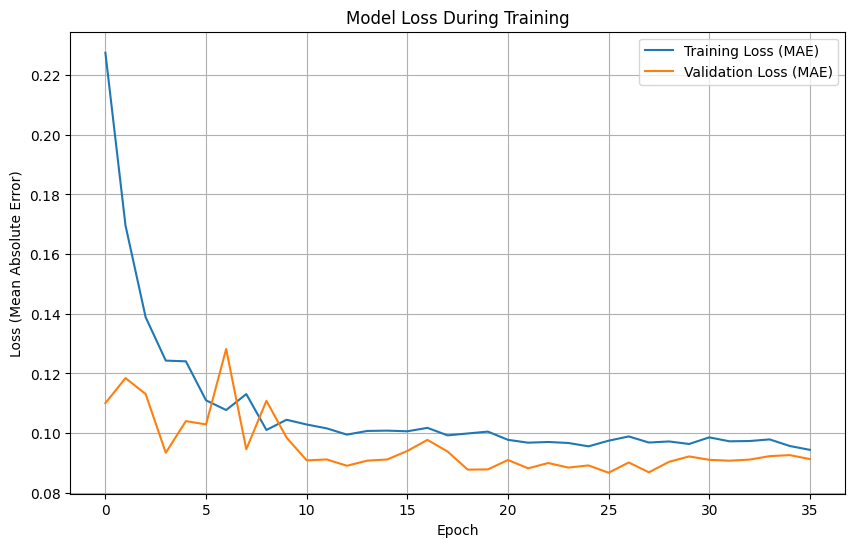

损失函数曲线图已保存至: /content/drive/MyDrive/Transformer_Project/loss_curve_v2_mae_fourier_retail.png


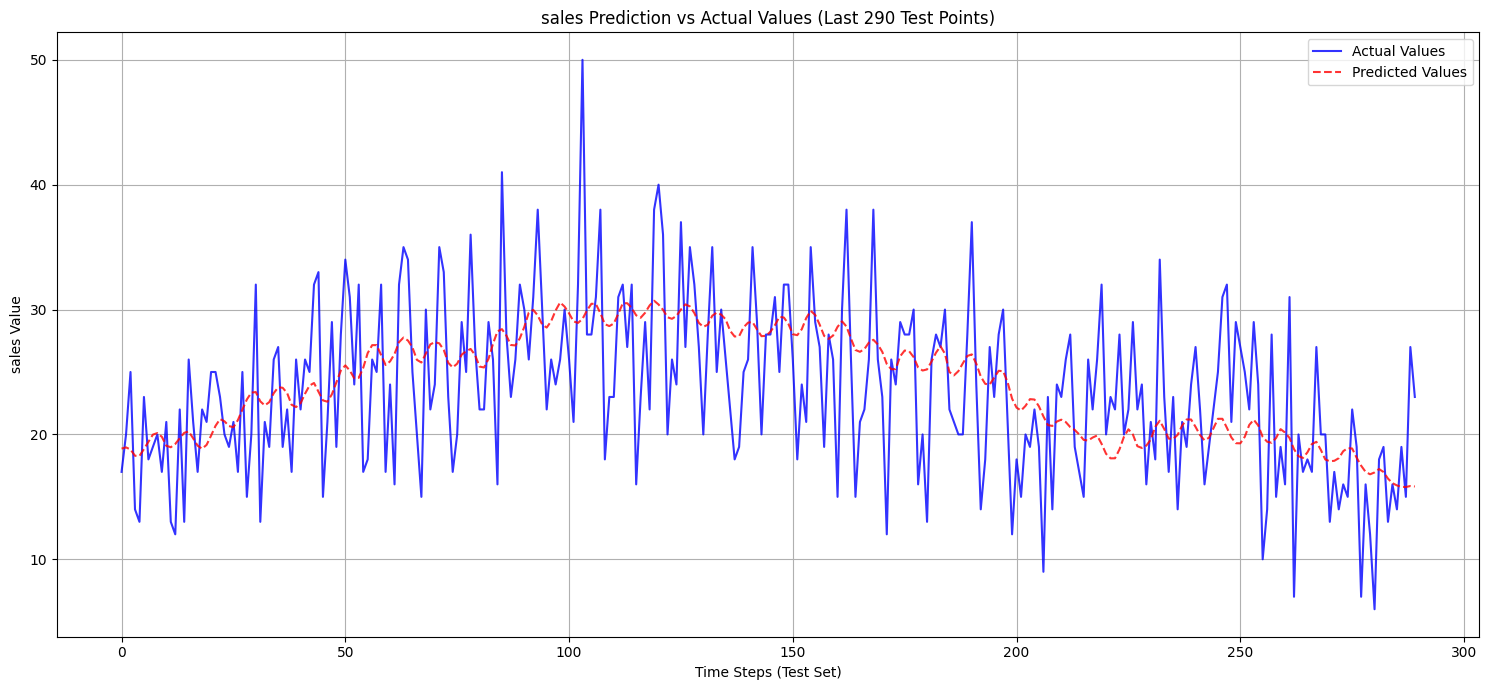

预测值与真实值对比图已保存至: /content/drive/MyDrive/Transformer_Project/prediction_vs_actual_v2_mae_fourier_retail.png

--- 步骤 9: 生成日志文件 ---
训练日志已成功保存至: /content/drive/MyDrive/Transformer_Project/training_log_v2_mae_fourier_retail.txt

--- Colab Notebook 执行完毕 ---


In [2]:
# -*- coding: utf-8 -*-
"""
Transformer_Finance_TimeSeries_Colab_Fixed_v2.ipynb

Automatically generated by Colaboratory.

Trains a Transformer model for time series forecasting using preprocessed financial data.
Includes fix for potential parameter type errors during model build.
**Version 2 Changes:**
- Added Fourier Features (Weekly, Yearly) to potentially capture seasonality.
- Changed loss function from MSE to MAE.
"""

#@markdown ## 0. 准备工作：挂载 Google Drive 并检查/安装库
#@markdown ---
#@markdown **重要提示:**
#@markdown 1. 确保你已经将数据文件上传到你的 Google Drive。
#@markdown 2. **在下一个代码单元格中，正确设置 `gdrive_base_path` 指向你存放数据和 Notebook 的 Google Drive 文件夹路径。**
#@markdown 3. 在 Colab 菜单中选择 "Runtime" -> "Change runtime type" -> "GPU" 以启用硬件加速。
#@markdown ---

from google.colab import drive
import os

try:
    drive.mount('/content/drive')
    print("Google Drive 挂载成功！")
except Exception as e:
    print(f"Google Drive 挂载失败: {e}")
    print("请确保你已授权 Colab 访问 Google Drive。")

# 检查/安装 psutil (通常 Colab 已包含，以防万一)
# !pip install psutil -q
# !pip install pyarrow -q # 确保 Parquet 库已安装

#@markdown ## 1. 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # MAPE needs careful handling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math
import time
import psutil # 用于监控内存
import datetime

# 设置随机种子以保证结果可复现
tf.random.set_seed(42)
np.random.seed(42)

print(f"TensorFlow 版本: {tf.__version__}")
print(f"NumPy 版本: {np.__version__}")
print(f"Pandas 版本: {pd.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")


#@markdown ## 2. 定义参数和加载数据
#@markdown ---
#@markdown **<<< 用户需要配置的部分 >>>**

#@markdown ### **重要: 设置 Google Drive 基础路径**
#@markdown 请将下面的路径修改为你存放数据文件和 Notebook 的 Google Drive 文件夹路径。
#@markdown 例如：如果你的文件在 "我的云端硬盘/Colab_Projects/Finance" 文件夹中，则路径应为 `'/content/drive/MyDrive/Colab_Projects/Finance/'`
gdrive_base_path = '/content/drive/MyDrive/Transformer_Project/' # <--- ******* 修改这里! *******

# 数据文件名 (确保它在上面的 gdrive_base_path 文件夹中)
csv_filename = 'data_with_lags_s1_i1.parquet' #@param {type:"string"} # 修改为你的 Parquet 文件名

# 假设 'Date' 或类似列是时间索引，如果不是，请指定正确的列或设置为 None
# 如果设置为 None，请确保文件中的数据是按时间顺序排列的
# --- 请根据你的实际列名修改 ---
date_column = 'date' #@param {type:"string"} # 例如 'date', 'Timestamp', 或 'None'

# 需要预测的目标列名
target_column = 'sales' #@param {type:"string"} # 例如 'Close', 'Value', 'Sales'

# 用作输入的特征列名列表 (留空则使用所有非日期/索引列，会自动加入傅里叶特征)
# 例如: feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_10', 'RSI']
# 如果数据已预处理且只包含必要特征，可以留空。
# **注意:** 下面这个列表会被自动添加傅里叶特征，如果你留空，则所有列(包括新特征)会被使用
feature_columns = ['sales', 'year', 'month', 'day', 'dayofweek', 'dayofyear',
       'weekofyear', 'quarter', 'is_month_start', 'is_month_end',
       'sales_lag_1', 'sales_lag_7', 'sales_lag_14', 'sales_lag_21',
       'sales_lag_28', 'sales_lag_30', 'sales_lag_60', 'sales_lag_90',
       'sales_lag_180', 'sales_lag_364', 'sales_lag_365', 'sales_roll_mean_7d',
       'sales_roll_std_7d', 'sales_roll_median_7d', 'sales_roll_min_7d',
       'sales_roll_max_7d', 'sales_roll_mean_14d', 'sales_roll_std_14d',
       'sales_roll_median_14d', 'sales_roll_min_14d', 'sales_roll_max_14d',
       'sales_roll_mean_28d', 'sales_roll_std_28d', 'sales_roll_median_28d',
       'sales_roll_min_28d', 'sales_roll_max_28d', 'sales_roll_mean_60d',
       'sales_roll_std_60d', 'sales_roll_median_60d', 'sales_roll_min_60d',
       'sales_roll_max_60d', 'sales_roll_mean_90d', 'sales_roll_std_90d',
       'sales_roll_median_90d', 'sales_roll_min_90d', 'sales_roll_max_90d'
       ] #@param {type:"raw"}

# 时间序列参数
sequence_length = 15  #@param {type:"integer"} # 使用过去 N 个时间步的数据来预测下一个时间步
test_size = 0.2       #@param {type:"number"} # 测试集比例 (例如 0.2 表示 20%)

# Transformer 模型超参数
head_size = 128             #@param {type:"integer"} # 注意力头的维度
num_heads = 4               #@param {type:"integer"} # 注意力头的数量
ff_dim = 128                #@param {type:"integer"} # 前馈网络内部层的维度
num_transformer_blocks = 4  #@param {type:"integer"} # Transformer 块的数量
mlp_units = [64]            #@param {type:"raw"} # 输出 MLP 层的单元数, e.g., [64] or [128, 64]
dropout = 0.1               #@param {type:"number"} # Transformer 块中的 Dropout 率
mlp_dropout = 0.1           #@param {type:"number"} # MLP 层中的 Dropout 率

# 训练参数
epochs = 50                 #@param {type:"integer"} # 训练轮数 (可根据需要提前停止)
batch_size = 64             #@param {type:"integer"} # 每批次样本数
learning_rate = 1e-4        #@param {type:"number"} # 学习率
early_stopping_patience = 10 #@param {type:"integer"} # 早停耐心值
reduce_lr_patience = 5      #@param {type:"integer"} # 学习率衰减耐心值

# --- 参数配置结束 ---

# 构建完整文件路径
file_path = os.path.join(gdrive_base_path, csv_filename)
log_file = os.path.join(gdrive_base_path, 'training_log_v2_mae_fourier_retail.txt') # 更新日志文件名
model_checkpoint_path = os.path.join(gdrive_base_path, "best_transformer_model_v2_mae_fourier_retail.keras") # 更新模型文件名
loss_curve_plot = os.path.join(gdrive_base_path, 'loss_curve_v2_mae_fourier_retail.png') # 更新图像文件名
prediction_plot = os.path.join(gdrive_base_path, 'prediction_vs_actual_v2_mae_fourier_retail.png') # 更新图像文件名

# --- 加载数据 (修改为 Parquet 并添加傅里叶特征) ---
print("--- 步骤 2: 加载数据 ---")
df = None # 初始化 df
df_features = None # 初始化 df_features
fourier_feature_names = [] # 初始化傅里叶特征名列表

# 检查基础路径是否存在
if not os.path.exists(gdrive_base_path):
    print(f"错误：指定的 Google Drive 路径不存在: {gdrive_base_path}")
    print("请确保路径正确，并且 Google Drive 已成功挂载。")
elif not os.path.exists(file_path):
    print(f"错误: 数据文件未在指定路径中找到: {file_path}")
    print(f"请确保 '{csv_filename}' 文件已上传到 '{gdrive_base_path}' 文件夹中。")
else:
     if not file_path.endswith('.parquet'):
          print(f"警告：文件路径 '{file_path}' 不是 .parquet 结尾，但将尝试作为 Parquet 读取。建议在参数中修正文件名。")

if os.path.exists(file_path): # 再次检查路径有效性
    try:
        print(f"尝试使用 pd.read_parquet 加载: {file_path}")
        df = pd.read_parquet(file_path, engine='pyarrow') # engine='pyarrow' 或 'fastparquet'
        print(f"成功加载 Parquet 数据: {file_path}")
        print(f"数据形状: {df.shape}")

        # 处理日期/索引列
        effective_date_column = date_column if date_column and date_column.lower() != 'none' else None
        time_index_available = False # Flag to check if we can use the index for time features
        if effective_date_column:
            if effective_date_column in df.columns:
                print(f"尝试将列 '{effective_date_column}' 设置为索引...")
                # Convert to datetime if it's not already (Parquet might handle this)
                if not pd.api.types.is_datetime64_any_dtype(df[effective_date_column]):
                     print(f"将列 '{effective_date_column}' 转换为 datetime 类型...")
                     df[effective_date_column] = pd.to_datetime(df[effective_date_column])
                df.set_index(effective_date_column, inplace=True)
                print(f"成功将 '{effective_date_column}' 设置为索引。")
                time_index_available = True # Index is now available and is datetime
            else:
                print(f"警告：指定的日期/索引列 '{effective_date_column}' 不在加载的 DataFrame 中。将不设置索引。")
                effective_date_column = None

        # --- START: 添加傅里叶特征 ---
        print("\n计算傅里叶特征...")
        if time_index_available:
            timestamp_s = df.index.map(pd.Timestamp.timestamp) # Convert index to seconds since epoch
            seconds_in_day = 24 * 60 * 60
            seconds_in_week = 7 * seconds_in_day
            seconds_in_year = (365.25) * seconds_in_day # Use 365.25 for average year length

            # 每周周期性
            df['sin_week'] = np.sin(2 * np.pi * timestamp_s / seconds_in_week)
            df['cos_week'] = np.cos(2 * np.pi * timestamp_s / seconds_in_week)
            fourier_feature_names.extend(['sin_week', 'cos_week'])

            # 每年周期性
            df['sin_year'] = np.sin(2 * np.pi * timestamp_s / seconds_in_year)
            df['cos_year'] = np.cos(2 * np.pi * timestamp_s / seconds_in_year)
            fourier_feature_names.extend(['sin_year', 'cos_year'])

            print(f"已添加傅里叶特征: {fourier_feature_names}")
        else:
            # 备选方案：如果日期索引不可用，可以尝试使用 'dayofyear' 等现有列（如果存在）
            print("警告：有效的日期索引不可用，无法基于精确时间戳计算傅里叶特征。")
            # 你可以根据需要在这里添加基于 'dayofyear' 或其他列的周期性特征
            # 例如（需要你有 dayofyear 列）:
            # if 'dayofyear' in df.columns:
            #     days_in_year = 365.25
            #     df['sin_year_approx'] = np.sin(2 * np.pi * df['dayofyear'] / days_in_year)
            #     df['cos_year_approx'] = np.cos(2 * np.pi * df['dayofyear'] / days_in_year)
            #     fourier_feature_names.extend(['sin_year_approx', 'cos_year_approx'])
            #     print(f"已添加基于 'dayofyear' 的近似年度傅里叶特征: {fourier_feature_names}")
            # else:
            #     print("也未找到 'dayofyear' 列，无法添加周期性特征。")
        # --- END: 添加傅里叶特征 ---


        # 确定特征列 (将傅里叶特征加入)
        if not feature_columns: # 如果用户没有指定特征列 (feature_columns 参数为空列表或 None)
            if effective_date_column and effective_date_column == df.index.name: # 检查是否是索引名
                 feature_columns = df.columns.tolist() # 索引不是列，直接用所有列 (包括新加的傅里叶特征)
            else: # 没有日期列或日期列无效
                 feature_columns = df.columns.tolist()
            print(f"自动选择所有可用列作为特征: {feature_columns}")
        else: # 如果用户指定了特征列
            # 确保目标列在里面
            if target_column not in feature_columns:
                print(f"警告: 目标列 '{target_column}' 不在指定的 feature_columns 中，已自动添加。")
                feature_columns.append(target_column)
            # 将新的傅里叶特征名添加到用户指定的列表中（如果它们还不存在）
            for fname in fourier_feature_names:
                if fname not in feature_columns:
                    feature_columns.append(fname)
            print("已将傅里叶特征添加到特征列列表中。")


        # 检查特征列是否存在 (这个逻辑保持不变，但现在 feature_columns 已更新)
        missing_cols = [col for col in feature_columns if col not in df.columns]
        if missing_cols:
            print(f"错误: 以下指定的特征列在 DataFrame 中不存在: {missing_cols}")
            raise ValueError("特征列在 DataFrame 中缺失")
        if target_column not in df.columns:
             print(f"错误: 目标列 '{target_column}' 在 DataFrame 中不存在。")
             raise ValueError("目标列在 DataFrame 中缺失")

        print(f"\n目标变量: {target_column}")
        print(f"最终使用的特征变量 (包括傅里叶特征): {feature_columns}") # 打印更新后的列表

        # 提取相关数据 (确保这行在傅里叶特征添加和 feature_columns 更新之后)
        df_features = df[feature_columns].copy()

        # 缺失值处理 (逻辑保持不变)
        if df_features.isnull().sum().sum() > 0:
            print("\n警告：数据中检测到缺失值。将使用前向填充 (ffill)。")
            df_features.ffill(inplace=True)
            if df_features.isnull().sum().sum() > 0:
                print("警告：前向填充后仍有缺失值，将使用后向填充 (bfill)。")
                df_features.bfill(inplace=True)
            if df_features.isnull().sum().sum() > 0:
                print("错误：填充后仍存在无法处理的缺失值。请检查数据。")
                raise ValueError("数据填充后仍有缺失值")
        else:
            print("\n数据完整性检查：未发现缺失值。")

        print("\n数据预览 (特征):")
        print(df_features.head())

    except ImportError:
         print("错误：读取 Parquet 文件需要 'pyarrow' 或 'fastparquet' 库。")
         print("请确保已运行 !pip install pyarrow (或 fastparquet)")
         df_features = None
    except Exception as e:
         print(f"加载或处理 Parquet 数据时发生错误: {e}")
         df_features = None

# --- Parquet 加载和傅里叶特征添加结束 ---


#@markdown ## 3. 数据缩放和序列创建
#@markdown **注意:** 即使数据已预处理，对神经网络输入进行 0-1 缩放通常也是必要的。

# --- 数据缩放 ---
print("\n--- 步骤 3: 数据缩放和序列创建 ---")
# 确保 df_features 已成功创建且是有效的 DataFrame
if 'df_features' in locals() and isinstance(df_features, pd.DataFrame):

    # --- 添加检查代码 ---
    print("--- 检查 df_features 的列类型和信息 (执行缩放前) ---")
    df_features.info() # 打印每列的类型和非空计数

    print("\n--- 检查 object 类型列的唯一值 (前 N 个) ---")
    # 选择数据类型为 'object' (通常是字符串) 的列
    object_cols = df_features.select_dtypes(include=['object']).columns
    found_non_numeric = False
    if not object_cols.empty:
        for col in object_cols:
            unique_values = df_features[col].unique()
            print(f"列 '{col}' (类型 object) 的唯一值 (最多显示 50 个): {unique_values[:50]}")
            # 检查是否包含 'train' 字符串或其他常见的非数值指示符
            common_non_numeric = ['train', 'test', 'valid', 'validation', 'Train', 'Test', 'Valid', 'Validation']
            if any(val in unique_values for val in common_non_numeric):
                print(f"*** 警告: 在列 '{col}' 中发现了可能的非数值标签! 请在 Cell 2 中从 feature_columns 排除此列。 ***")
                found_non_numeric = True
            # 可以在这里添加对其他非数值内容的检查
    else:
        print("未找到 object 类型的列。如果后续缩放报错，请检查是否存在看似数字但实际包含非数字字符的列。")

    if found_non_numeric:
         print("\n!!! 重要提示: 检测到包含非数值内容的列。请返回第二个单元格，修改 `feature_columns` 列表，仅包含纯数值特征列，然后再重新运行。 !!!")
         # 可以选择在这里停止执行，或者让它继续尝试并可能在下一步报错
         # raise ValueError("检测到非数值列，请修正 feature_columns") # 取消注释这行可以在这里强制停止

    print("--- 检查代码结束 ---")
    # --- 检查代码结束 ---

    # 如果检查通过（或用户选择忽略警告），则继续执行缩放
    try:
        scaler = MinMaxScaler(feature_range=(0, 1))
        # scaler 需要在整个特征集上 fit，即使我们只预测一列
        scaled_data = scaler.fit_transform(df_features)
        print(f"\n数据已缩放至 [0, 1] 范围，形状: {scaled_data.shape}")

        # 获取目标列在缩放后数据中的索引
        try:
            # 使用更新后的 feature_columns 列表来查找索引
            target_col_index = feature_columns.index(target_column)
            print(f"目标列 '{target_column}' 在缩放数据中的索引为: {target_col_index}")
        except ValueError:
            print(f"错误：目标列 '{target_column}' 不在最终使用的特征列列表中（feature_columns: {feature_columns}）。")
            scaled_data = None # Mark failure

        # --- 创建时间序列样本 ---
        def create_sequences(data, seq_length, target_idx):
            X, y = [], []
            # 数据长度需要至少是 seq_length + 1
            if len(data) <= seq_length:
                 print(f"错误：数据长度 ({len(data)}) 不足以创建长度为 {seq_length} 的序列。")
                 return None, None
            for i in range(len(data) - seq_length):
                X.append(data[i:(i + seq_length)]) # 输入序列
                y.append(data[i + seq_length, target_idx]) # 目标值（下一个时间步的目标列）
            return np.array(X), np.array(y)

        if scaled_data is not None:
            X, y = create_sequences(scaled_data, sequence_length, target_col_index)
            if X is not None and len(X) > 0: # 检查序列是否成功创建且不为空
                 print(f"\n已创建时间序列样本:")
                 print(f"输入 X 的形状: {X.shape}") # (样本数, 时间步长, 特征数)
                 print(f"目标 y 的形状: {y.shape}") # (样本数,)
            elif X is not None and len(X) == 0:
                 print("错误：序列创建成功，但样本数量为零。请检查数据长度和 sequence_length。")
                 X, y = None, None # Mark failure
            else:
                 print("序列创建失败。")
                 X, y = None, None # Mark failure
        else:
            print("错误：scaled_data 无效，无法创建序列。")
            X, y = None, None # Mark failure

    except ValueError as e:
        # 捕获 scaler.fit_transform 可能抛出的 ValueError (例如 "could not convert string to float")
        print(f"\n错误：在执行数据缩放时遇到问题: {e}")
        print("!!! 这通常意味着即使通过了初步检查，df_features 中仍存在非数值数据。请返回第二个单元格，仔细检查并修正 `feature_columns` 列表，确保只包含纯数值列。 !!!")
        X, y = None, None # Mark failure
    except Exception as e:
        print(f"\n错误：在缩放或序列创建过程中发生意外错误: {e}")
        X, y = None, None # Mark failure

# 这个 else 对应于最外层的 if 'df_features' in locals()...
else:
    print("错误：无法执行此步骤（数据缩放和序列创建），因为数据加载或预处理失败（df_features 无效）。请检查之前的步骤。")
    X, y = None, None # Mark failure

#@markdown ## 4. 数据集划分
print("\n--- 步骤 4: 数据集划分 ---")
if X is not None and y is not None: # 确保 X, y 已成功创建且不为 None
    # 按时间顺序划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=False # 时间序列不应打乱顺序
    )
    if len(X_train) == 0 or len(X_test) == 0:
         print("错误：数据集划分后训练集或测试集为空。")
         print(f"请检查原始数据长度、sequence_length ({sequence_length}) 和 test_size ({test_size}) 是否合理。")
         X_train, X_test = None, None # Mark failure
    else:
         print(f"训练集 X_train 形状: {X_train.shape}, y_train 形状: {y_train.shape}")
         print(f"测试集 X_test 形状: {X_test.shape}, y_test 形状: {y_test.shape}")
else:
    print("错误：无法执行此步骤，因为序列创建失败。请检查之前的步骤。")
    X_train, X_test = None, None # Mark failure


#@markdown ## 5. 构建 Transformer 模型
print("\n--- 步骤 5: 构建 Transformer 模型 ---")

# --- Transformer 编码器块 ---
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Multi-Head Self-Attention
    attn_output = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    attn_output = layers.Dropout(dropout)(attn_output)
    out1 = layers.LayerNormalization(epsilon=1e-6)(inputs + attn_output) # Add & Norm

    # Feed Forward Part
    ffn_output = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(out1)
    ffn_output = layers.Dropout(dropout)(ffn_output)
    # Project back to input shape
    ffn_output = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(ffn_output)
    out2 = layers.LayerNormalization(epsilon=1e-6)(out1 + ffn_output) # Add & Norm
    return out2

# --- 位置编码层 (修正后) ---
class PositionalEncoding(layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        # Precompute the positional encoding matrix
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)
        # Apply sin to even indices in the array; 2i
        sines = tf.math.sin(angle_rads[:, 0::2])
        # Apply cos to odd indices in the array; 2i+1
        cosines = tf.math.cos(angle_rads[:, 1::2])
        # Concatenate sines and cosines
        pos_encoding = tf.concat([sines, cosines], axis=-1)
        # Add batch dimension
        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        # inputs shape: (batch_size, seq_len, d_model)
        seq_len = tf.shape(inputs)[1]
        input_last_dim = tf.shape(inputs)[-1]
        pos_encoding_last_dim = tf.shape(self.pos_encoding)[-1]

        # Defensive check (optional but good practice)
        tf.debugging.assert_equal(input_last_dim, pos_encoding_last_dim,
                                   message=f"Input dimension ({input_last_dim}) and PositionalEncoding dimension ({pos_encoding_last_dim}) mismatch.")

        return inputs + self.pos_encoding[:, :seq_len, :]

# --- 构建完整模型 ---
def build_transformer_model(
    input_shape, head_size, num_heads, ff_dim, num_transformer_blocks,
    mlp_units, dropout=0, mlp_dropout=0):
    # Add input validation
    if not isinstance(input_shape, tuple) or len(input_shape) != 2:
        raise ValueError(f"Expected input_shape to be a tuple of length 2, but got {input_shape}")
    if not all(isinstance(dim, int) for dim in input_shape):
         raise ValueError(f"Expected dimensions in input_shape to be integers, but got {[type(dim) for dim in input_shape]}")

    inputs = keras.Input(shape=input_shape) # Shape: (seq_length, num_features)
    x = inputs
    d_model = input_shape[-1] # num_features
    position = input_shape[0] # seq_length

    # Add Positional Encoding
    x = PositionalEncoding(position, d_model)(x)

    # Create multiple Transformer Encoder blocks
    # Ensure parameters used here are integers
    head_size = int(head_size)
    num_heads = int(num_heads)
    ff_dim = int(ff_dim)
    num_transformer_blocks = int(num_transformer_blocks)
    dropout = float(dropout)
    mlp_dropout = float(mlp_dropout)

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    # Aggregate sequence information - Global Average Pooling is common
    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)

    # Final MLP head for regression output
    # Ensure mlp_units is a list of integers
    if not isinstance(mlp_units, list):
         # Try to handle if user provided a single number like 64 instead of [64]
         try:
             mlp_units_int = [int(mlp_units)]
         except ValueError:
             raise ValueError(f"Expected mlp_units to be a list or a single integer, but got {type(mlp_units)}")
    else:
         processed_mlp_units = []
         for dim_str in mlp_units:
            try:
                 processed_mlp_units.append(int(dim_str))
            except ValueError:
                 raise ValueError(f"Could not convert MLP unit '{dim_str}' to integer.")
         mlp_units_int = processed_mlp_units


    for dim in mlp_units_int: # Use the processed list
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x) # Output a single value prediction
    return keras.Model(inputs, outputs)

# --- 定位 input_shape 和 强制类型转换 ---
input_shape = None
model = None # Initialize model to None

if 'X_train' in locals() and X_train is not None:
    input_shape = X_train.shape[1:]
    print(f"调试信息：计算得到的 input_shape: {input_shape}, 类型: {type(input_shape)}, 各元素类型: {[type(x) for x in input_shape]}")

    # --- 强制转换关键超参数为整数 ---
    if input_shape is not None and len(input_shape) == 2 and all(isinstance(dim, int) for dim in input_shape): # Check if input_shape is valid
        try:
            # 从 Colab 表单获取的参数可能需要显式转换
            head_size_int = int(head_size)
            num_heads_int = int(num_heads)
            ff_dim_int = int(ff_dim)
            num_transformer_blocks_int = int(num_transformer_blocks)

            # 检查 mlp_units 是否为列表，如果是，尝试转换内部元素
            if isinstance(mlp_units, list):
                 mlp_units_int = [int(u) for u in mlp_units]
            else:
                 # 如果不是列表（例如用户输入了单个数字），尝试转换并放入列表
                 mlp_units_int = [int(mlp_units)]
                 print(f"警告：mlp_units 不是列表，已尝试转换为 {mlp_units_int}")


            print(f"调试信息：强制转换后的整数参数 - head_size: {head_size_int}, num_heads: {num_heads_int}, ff_dim: {ff_dim_int}, num_blocks: {num_transformer_blocks_int}, mlp_units: {mlp_units_int}")

            # --- 使用强制转换后的整数参数调用模型构建函数 ---
            print("尝试构建模型...")
            model = build_transformer_model(
                input_shape=input_shape,
                head_size=head_size_int,                # 使用转换后的 int
                num_heads=num_heads_int,                # 使用转换后的 int
                ff_dim=ff_dim_int,                      # 使用转换后的 int
                num_transformer_blocks=num_transformer_blocks_int, # 使用转换后的 int
                mlp_units=mlp_units_int,                # 使用转换后的 list[int]
                dropout=float(dropout),                 # 确保是 float
                mlp_dropout=float(mlp_dropout),         # 确保是 float
            )
            print("模型构建完成。")
            model.summary(line_length=100)

        except ValueError as e:
            print(f"错误：无法将某个模型超参数转换为预期类型（通常是整数）。请仔细检查 Cell 2 中的参数设置。错误详情: {e}")
            model = None # 标记失败
        except Exception as e:
            print(f"构建模型时发生其他错误: {e}")
            model = None # 标记失败
    else:
        print("错误：input_shape 无效，无法构建模型。")
        model = None # Mark failure
else:
    print("错误：X_train 不可用，无法确定 input_shape 或构建模型。")
    model = None # Mark failure


#@markdown ## 6. 编译和训练模型
print("\n--- 步骤 6: 编译和训练模型 ---")
if model is not None and X_train is not None: # Ensure model and data are ready
    # Compile the model
    # --- 修改这里: 将损失函数改为 MAE ---
    model.compile(
        loss="mean_absolute_error", # <--- CHANGED HERE to MAE
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate)
    )
    # --- 修改结束 ---
    print("模型编译完成 (使用 MAE 损失函数)。") # 更新打印信息

    # Define callbacks for training
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            model_checkpoint_path, # Save the best model (updated path)
            save_best_only=True,
            monitor="val_loss", # Based on validation loss
            verbose=0 # Less verbose in Colab
        ),
        keras.callbacks.EarlyStopping(
            monitor="val_loss",
            patience=early_stopping_patience, # Stop if no improvement
            restore_best_weights=True, # Keep the best weights found
            verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.5, # Reduce LR by half
            patience=reduce_lr_patience, # If no improvement for N epochs
            verbose=1
        )
    ]

    # Record memory and time before training
    process = psutil.Process(os.getpid())
    mem_before = process.memory_info().rss / (1024 * 1024) # Convert bytes to MB
    start_time = time.time()

    print(f"\n开始训练模型 (Epochs: {epochs}, Batch Size: {batch_size}, Loss: MAE)...") # 更新打印信息
    # Train the model
    history = model.fit(
        X_train,
        y_train,
        validation_split=0.1, # Use 10% of training data for validation during training
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1 # Show progress bar per epoch
    )

    # Record memory and time after training
    end_time = time.time()
    mem_after = process.memory_info().rss / (1024 * 1024) # Convert bytes to MB
    training_time = end_time - start_time
    # Note: peak_memory_usage might be higher than mem_after, psutil gives current usage.
    peak_memory_usage = mem_after # Use mem_after as an approximation
    memory_increase = mem_after - mem_before

    print("\n模型训练完成。")
    print(f"训练耗时: {training_time:.2f} 秒")
    print(f"训练前内存占用: {mem_before:.2f} MB")
    print(f"训练后内存占用: {mem_after:.2f} MB")
    print(f"训练期间内存增加量 (约): {memory_increase:.2f} MB")

else:
    print("错误：无法执行此步骤，模型或训练数据未准备好。请检查之前的步骤。")
    history = None # Mark history as unavailable


#@markdown ## 7. 评估模型
print("\n--- 步骤 7: 评估模型 ---")
# Ensure model, test data, and scaler exist and are not None
if 'X_test' in locals() and X_test is not None and 'scaler' in locals() and scaler is not None and 'scaled_data' in locals() and scaled_data is not None and 'history' in locals() and history is not None: # Added history check
    # Load the best performing model saved during training
    print(f"加载在验证集上表现最佳的模型: {model_checkpoint_path}")
    try:
       # It's generally better to load the explicitly saved best model
       best_model = keras.models.load_model(model_checkpoint_path)
       print("最佳模型加载成功。")
    except Exception as e:
       print(f"警告：无法加载检查点模型 '{model_checkpoint_path}' ({e})。")
       print("将使用训练结束时的模型进行评估（如果启用了 restore_best_weights，这可能已经是最佳模型）。")
       # Ensure model exists before assigning
       if 'model' in locals() and model is not None:
           best_model = model # Fallback to the model in memory
       else:
           print("错误：内存中的模型也无效，无法进行评估。")
           best_model = None # Mark failure


    # Generate predictions on the test set only if best_model is valid
    if best_model is not None:
        print("在测试集上生成预测值...")
        try:
            y_pred_scaled = best_model.predict(X_test) # Predictions are scaled (0-1)

            # --- Inverse transform predictions and actual values ---
            print("反归一化预测值和真实值...")
            # We need to reshape the predictions and true values to match the scaler's expected input shape
            # Create a dummy array with the same number of features as the original data
            num_features = scaled_data.shape[1]

            # Inverse transform predictions
            dummy_pred = np.zeros((len(y_pred_scaled), num_features))
            # Place the scaled predictions into the column corresponding to the target variable
            dummy_pred[:, target_col_index] = y_pred_scaled.flatten()
            # Apply inverse transform
            y_pred = scaler.inverse_transform(dummy_pred)[:, target_col_index]

            # Inverse transform true values (y_test)
            dummy_true = np.zeros((len(y_test), num_features))
            dummy_true[:, target_col_index] = y_test.flatten()
            y_true = scaler.inverse_transform(dummy_true)[:, target_col_index]
            print("反归一化完成。")


            # --- Calculate Evaluation Metrics ---
            print("\n计算评估指标:")
            mse = mean_squared_error(y_true, y_pred)
            rmse = math.sqrt(mse)
            mae = mean_absolute_error(y_true, y_pred) # This is now the primary loss metric used for training

            # Calculate MAPE carefully to avoid division by zero
            mask = y_true != 0 # Create a mask for non-zero true values
            if np.sum(mask) == 0:
                mape = np.inf # Or np.nan, if all true values are zero
                print("警告: 无法计算 MAPE，因为所有真实值均为零。")
            else:
                 # Ensure y_pred[mask] has the same shape for division
                 mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100


            r2 = r2_score(y_true, y_pred)

            # Calculate Adjusted R²
            n = len(y_true) # Number of samples in the test set
            p = X_test.shape[2] # Number of features (predictors) used in the input sequence
            if n - p - 1 != 0:
                adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
            else:
                # Adjusted R2 is undefined if denominator is zero
                adj_r2 = np.nan
                print("警告: 无法计算调整 R² (n - p - 1 = 0)。")


            metrics = {
                'RMSE': rmse,
                'MSE': mse,
                'MAE': mae,
                'MAPE (%)': mape,
                'R2': r2,
                'Adj_R2': adj_r2
            }

            print(f"均方根误差 (RMSE): {metrics['RMSE']:.4f}")
            print(f"均方误差 (MSE): {metrics['MSE']:.4f}")
            print(f"平均绝对误差 (MAE): {metrics['MAE']:.4f}") # Training loss is based on this
            print(f"平均绝对百分比误差 (MAPE): {metrics['MAPE (%)']:.2f}%")
            print(f"R² 分数: {metrics['R2']:.4f}")
            print(f"调整 R² 分数: {metrics['Adj_R2']:.4f}")

        except Exception as e:
            print(f"评估模型或计算指标时出错: {e}")
            # Ensure metrics dictionary exists for logging even if evaluation fails
            if 'metrics' not in locals():
                metrics = { 'RMSE': np.nan, 'MSE': np.nan, 'MAE': np.nan, 'MAPE (%)': np.nan, 'R2': np.nan, 'Adj_R2': np.nan }
            y_true, y_pred = None, None # Mark results as unavailable
    else: # if best_model is None
        print("错误：无法加载或获取有效模型进行评估。")
        if 'metrics' not in locals():
            metrics = { 'RMSE': np.nan, 'MSE': np.nan, 'MAE': np.nan, 'MAPE (%)': np.nan, 'R2': np.nan, 'Adj_R2': np.nan }
        y_true, y_pred = None, None # Mark results as unavailable

else:
    print("错误：无法执行此步骤，模型、测试数据、缩放器或训练历史未准备好。请检查之前的步骤。")
    # Ensure metrics dictionary exists for logging even if evaluation fails
    if 'metrics' not in locals():
        metrics = { 'RMSE': np.nan, 'MSE': np.nan, 'MAE': np.nan, 'MAPE (%)': np.nan, 'R2': np.nan, 'Adj_R2': np.nan }
    y_true, y_pred = None, None # Mark results as unavailable


#@markdown ## 8. 结果可视化
print("\n--- 步骤 8: 结果可视化 ---")
# Check if training history and predictions are available
if history is not None and 'y_true' in locals() and y_true is not None and 'y_pred' in locals() and y_pred is not None:
    # --- Plot Training & Validation Loss ---
    try:
        plt.figure(figsize=(10, 6))
        # --- 修改标签以反映 MAE ---
        plt.plot(history.history['loss'], label='Training Loss (MAE)') # <-- CHANGED LABEL
        plt.plot(history.history['val_loss'], label='Validation Loss (MAE)') # <-- CHANGED LABEL
        plt.title('Model Loss During Training')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (Mean Absolute Error)') # <-- CHANGED Y-LABEL
        # --- 修改结束 ---
        plt.legend()
        plt.grid(True)
        plt.savefig(loss_curve_plot) # Save the plot (updated path)
        plt.show()
        print(f"损失函数曲线图已保存至: {loss_curve_plot}")
    except Exception as e:
        print(f"绘制损失函数曲线时出错: {e}")


    # --- Plot Predictions vs Actual Values ---
    try:
        plt.figure(figsize=(15, 7))
        # Plot a subset for clarity if the test set is large
        plot_points = min(len(y_true), 500) # Adjust number of points to plot if needed
        time_steps = np.arange(len(y_true)) # Create time steps for x-axis

        plt.plot(time_steps[-plot_points:], y_true[-plot_points:], label='Actual Values', color='blue', alpha=0.8, linewidth=1.5)
        plt.plot(time_steps[-plot_points:], y_pred[-plot_points:], label='Predicted Values', color='red', linestyle='--', alpha=0.8, linewidth=1.5)

        plt.title(f'{target_column} Prediction vs Actual Values (Last {plot_points} Test Points)')
        plt.xlabel(f'Time Steps (Test Set)')
        plt.ylabel(f'{target_column} Value')
        plt.legend()
        plt.grid(True)
        plt.tight_layout() # Adjust layout
        plt.savefig(prediction_plot) # Save the plot (updated path)
        plt.show()
        print(f"预测值与真实值对比图已保存至: {prediction_plot}")
    except Exception as e:
        print(f"绘制预测值与真实值对比图时出错: {e}")

else:
    print("错误：无法执行此步骤，训练历史或预测结果未准备好。请检查之前的步骤。")


#@markdown ## 9. 生成日志文件
print("\n--- 步骤 9: 生成日志文件 ---")
# Try to get actual epochs run from history, provide defaults if training failed
epochs_run = len(history.history['loss']) if history and 'loss' in history.history else 'N/A'

# Provide default values for logging if training/evaluation failed
training_time_val = training_time if 'training_time' in locals() else np.nan
mem_before_val = mem_before if 'mem_before' in locals() else np.nan
mem_after_val = mem_after if 'mem_after' in locals() else np.nan
memory_increase_val = memory_increase if 'memory_increase' in locals() else np.nan
# Use the potentially updated feature_columns list
features_list_str = str(feature_columns) if 'feature_columns' in locals() and feature_columns is not None else 'N/A'


# Ensure metrics dictionary exists and provide default NaN values if keys are missing
if 'metrics' not in locals():
    metrics = {} # Initialize if it doesn't exist
metrics_defaults = { 'RMSE': np.nan, 'MSE': np.nan, 'MAE': np.nan, 'MAPE (%)': np.nan, 'R2': np.nan, 'Adj_R2': np.nan }
for key, default_value in metrics_defaults.items():
    if key not in metrics:
        metrics[key] = default_value


log_content = f"""
=================================================
Transformer Model Training Log (Google Colab) - v2 (MAE Loss, Fourier Features)
=================================================
Date and Time: {datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")} (UTC)

--- Data Configuration ---
Google Drive Base Path: {gdrive_base_path}
Data File: {csv_filename}
Date/Index Column: {date_column if date_column else 'None'}
Target Column: {target_column}
Fourier Features Added (if time index available): {fourier_feature_names if fourier_feature_names else 'None or Failed'}
Feature Columns Used: {features_list_str}
Sequence Length: {sequence_length}
Test Set Size: {test_size}

--- Model Hyperparameters ---
Head Size: {head_size}
Number of Heads: {num_heads}
Feed-Forward Dim: {ff_dim}
Transformer Blocks: {num_transformer_blocks}
MLP Units: {mlp_units}
Dropout: {dropout}
MLP Dropout: {mlp_dropout}

--- Training Details ---
Loss Function: Mean Absolute Error (MAE)
Epochs Run: {epochs_run} (Max Epochs Configured: {epochs})
Batch Size: {batch_size}
Learning Rate: {learning_rate}
Best Model Saved To: {model_checkpoint_path if 'model_checkpoint_path' in locals() and os.path.exists(model_checkpoint_path) else 'Not Saved or Error'}
Training Time: {training_time_val:.2f} seconds

--- Resource Usage ---
Memory Usage Before Training: {mem_before_val:.2f} MB
Memory Usage After Training: {mem_after_val:.2f} MB
Approx. Memory Increase During Training: {memory_increase_val:.2f} MB

--- Evaluation Metrics (Test Set) ---
RMSE: {metrics.get('RMSE', np.nan):.6f}
MSE: {metrics.get('MSE', np.nan):.6f}
MAE: {metrics.get('MAE', np.nan):.6f} (Training Loss Metric)
MAPE (%): {metrics.get('MAPE (%)', np.nan):.2f}
R2 Score: {metrics.get('R2', np.nan):.6f}
Adjusted R2 Score: {metrics.get('Adj_R2', np.nan):.6f}

--- Output Files ---
Loss Curve Plot: {loss_curve_plot if 'loss_curve_plot' in locals() else 'N/A'}
Prediction Plot: {prediction_plot if 'prediction_plot' in locals() else 'N/A'}
Log File: {log_file if 'log_file' in locals() else 'N/A'}
=================================================
"""

try:
    # Ensure the directory exists before writing
    if 'log_file' in locals():
        os.makedirs(os.path.dirname(log_file), exist_ok=True)
        with open(log_file, 'w', encoding='utf-8') as f:
            f.write(log_content)
        print(f"训练日志已成功保存至: {log_file}")
    else:
        print("错误：无法写入日志文件，因为 log_file 变量未定义。")
except Exception as e:
    print(f"错误：无法写入日志文件 {log_file if 'log_file' in locals() else '路径未知'}。错误信息: {e}")
    print("请确保 Google Drive 路径正确并且 Colab 有写入权限。")

print("\n--- Colab Notebook 执行完毕 ---")